#### Mounting Google Drive

In [55]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SE4AI-Quantum/Q-DELOREAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SE4AI-Quantum/Q-DELOREAN


#### Importing packages

In [56]:
import re
import string

import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob
from textblob import Word

from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load data

In [57]:
DATASET_PATH = 'data/interim/promise-reclass_filtered.csv'
DATASET_FOLDER_PATH = 'data/processed/'

data = pd.read_csv(DATASET_PATH)

#### Feature selection and engineering

In [58]:
to_drop_columns = ['ProjectID', 'IsFunctional', 'IsQuality']

data = data.drop(to_drop_columns, axis=1)

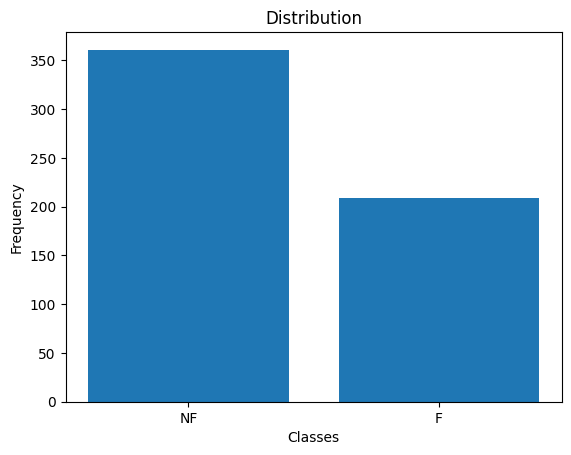

In [59]:
X_columns = ['RequirementText']
y_columns = ['Class']

to_update_classes = {'US', 'SE', 'O', 'PE', 'LF', 'SC', 'A', 'MN', 'L', 'FT', 'PO'}
data[y_columns] = data[y_columns].replace(to_update_classes, 'NF')

distribution = data[y_columns[0]].value_counts()
plt.bar(distribution.index, distribution.values)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

#### Text Normalization

In [60]:
def normalize_text(text):
  # Remove punctuation
  punctuation_to_keep = ['/', '%']
  punctuation_to_remove = ''.join([p for p in string.punctuation if p not in punctuation_to_keep])
  text = text.apply(lambda x: re.sub('[%s]' % re.escape(punctuation_to_remove), '', x))
  
  # Replace '%' symbol
  text = text.apply(lambda x: x.replace("%", " percent"))

  # Tokenization
  text = text.apply(lambda x: word_tokenize(x.lower()))

  # Lemmatization
  text = text.apply(lambda x: [Word(word).lemmatize() for word in x])

  return text.apply(lambda x: ' '.join(x))

data[X_columns] = data[X_columns].apply(normalize_text)

#### Save data

In [61]:
data.to_csv(DATASET_FOLDER_PATH + 'promise-reclass_processed.csv', index=False)